In [101]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
df = pd.read_csv('Part_1_Crime_Data.csv', low_memory=False)

In [103]:
df.head(10)

X          Y  RowID  CCNumber           CrimeDateTime CrimeCode  \
0 -76.565233  39.329364      1  23H00334  2023/08/01 18:20:00+00        4E   
1 -76.676985  39.287522      2  23H00373  2023/08/01 21:26:00+00       3AF   
2 -76.560460  39.330913      3  23H00588  2023/08/01 18:30:00+00        5F   
3 -76.629319  39.248490      4  23K02505  2023/08/01 12:00:00+00        6F   
4 -76.621136  39.291551      5  23H00046  2023/08/01 01:16:00+00        6F   
5 -76.685439  39.279872      6  23H04775  2023/08/01 00:00:00+00        6F   
6 -76.587509  39.221677      7  23H00304  2023/08/01 00:00:00+00        7A   
7 -76.599266  39.323276      8  23H01339  2023/08/01 17:00:00+00        6F   
8 -76.578652  39.285064      9  23H00506  2023/08/01 17:00:00+00        6D   
9 -76.566037  39.350816     10  23H00505  2023/08/01 18:30:00+00        7A   

         Description Inside_Outside            Weapon   Post  ...  \
0     COMMON ASSAULT        Outside  PERSONAL_WEAPONS  421.0  ...   
1            ROBBERY         Inside           HANDGUN  821.0  ...   
2           BURGLARY        Outside               NaN  433.0  ...   
3            LARCENY            NaN               NaN  921.0  ...   
4            LARCENY         Inside               NaN  112.0  ...   
5            LARCENY        Outside               NaN  815.0  ...   
6         AUTO THEFT         Inside               NaN  913.0  ...   
7            LARCENY         Inside               NaN  315.0  ...   
8  LARCENY FROM AUTO         Inside               NaN  211.0  ...   
9         AUTO THEFT         Inside               NaN  421.0  ...   

                Ethnicity            Location Old_District New_District  \
0  NOT_HISPANIC_OR_LATINO    4100 EIERMAN AVE          NaN    NORTHEAST   
1                 UNKNOWN   0 N MONASTERY AVE          NaN    SOUTHWEST   
2  NOT_HISPANIC_OR_LATINO     4600 ASBURY AVE          NaN    NORTHEAST   
3  NOT_HISPANIC_OR_LATINO     2700 SPELMAN RD          NaN     SOUTHERN   
4                 UNKNOWN      200 N EUTAW ST          NaN      CENTRAL   
5  NOT_HISPANIC_OR_LATINO        400 YALE AVE          NaN    SOUTHWEST   
6  NOT_HISPANIC_OR_LATINO      1600 CEREAL ST          NaN     SOUTHERN   
7  NOT_HISPANIC_OR_LATINO   1400 HOMESTEAD ST          NaN      EASTERN   
8                 UNKNOWN  600 S LAKEWOOD AVE          NaN    SOUTHEAST   
9                 UNKNOWN    2800 GOODWOOD RD          NaN    NORTHEAST   

                      Neighborhood   Latitude  Longitude  \
0                  BELAIR-PARKSIDE  39.329364 -76.565233   
1                    SAINT JOSEPHS  39.287522 -76.676985   
2                        FRANKFORD  39.330913 -76.560460   
3                      CHERRY HILL  39.248490 -76.629319   
4                         DOWNTOWN  39.291551 -76.621136   
5                        IRVINGTON  39.279872 -76.685439   
6                       CURTIS BAY  39.221677 -76.587509   
7  COLDSTREAM HOMESTEAD MONTEBELLO  39.323276 -76.599266   
8                           CANTON  39.285064 -76.578652   
9                       LAURAVILLE  39.350816 -76.566037   

                                GeoLocation        PremiseType  \
0  (39.329363999999998,-76.565233000000006)  OTHER/RESIDENTIAL   
1  (39.287522000000003,-76.676985000000002)             STREET   
2  (39.330913000000002,-76.560460000000006)  OTHER/RESIDENTIAL   
3  (39.248489999999997,-76.629318999999995)                NaN   
4  (39.291550999999998,-76.621136000000007)             STREET   
5  (39.279871999999997,-76.685439000000002)  OTHER/RESIDENTIAL   
6           (39.221677,-76.587508999999997)             STREET   
7                    (39.323276,-76.599266)             STREET   
8  (39.285063999999998,-76.578652000000005)             STREET   
9  (39.350816000000002,-76.566036999999994)             STREET   

   Total_Incidents  
0                1  
1                1  
2                1  
3                1  
4                1  
5                1  
6                1  
7         

In [104]:
df.columns

Index(['X', 'Y', 'RowID', 'CCNumber', 'CrimeDateTime', 'CrimeCode',
       'Description', 'Inside_Outside', 'Weapon', 'Post', 'Gender', 'Age',
       'Race', 'Ethnicity', 'Location', 'Old_District', 'New_District',
       'Neighborhood', 'Latitude', 'Longitude', 'GeoLocation', 'PremiseType',
       'Total_Incidents'],
      dtype='object')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158700 entries, 0 to 158699
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                158562 non-null  float64
 1   Y                158562 non-null  float64
 2   RowID            158700 non-null  int64  
 3   CCNumber         158700 non-null  object 
 4   CrimeDateTime    158700 non-null  object 
 5   CrimeCode        158700 non-null  object 
 6   Description      158700 non-null  object 
 7   Inside_Outside   143118 non-null  object 
 8   Weapon           60525 non-null   object 
 9   Post             157723 non-null  float64
 10  Gender           134833 non-null  object 
 11  Age              133774 non-null  float64
 12  Race             137758 non-null  object 
 13  Ethnicity        67353 non-null   object 
 14  Location         156723 non-null  object 
 15  Old_District     136897 non-null  object 
 16  New_District     20833 non-null   obje

In [106]:
df.isnull().sum()

X                     138
Y                     138
RowID                   0
CCNumber                0
CrimeDateTime           0
CrimeCode               0
Description             0
Inside_Outside      15582
Weapon              98175
Post                  977
Gender              23867
Age                 24926
Race                20942
Ethnicity           91347
Location             1977
Old_District        21803
New_District       137867
Neighborhood         1325
Latitude              138
Longitude             138
GeoLocation             0
PremiseType         15582
Total_Incidents         0
dtype: int64

In [107]:
null_per = df.isnull().sum()/len(df)
null_per

X                  0.000870
Y                  0.000870
RowID              0.000000
CCNumber           0.000000
CrimeDateTime      0.000000
CrimeCode          0.000000
Description        0.000000
Inside_Outside     0.098185
Weapon             0.618620
Post               0.006156
Gender             0.150391
Age                0.157064
Race               0.131960
Ethnicity          0.575595
Location           0.012457
Old_District       0.137385
New_District       0.868727
Neighborhood       0.008349
Latitude           0.000870
Longitude          0.000870
GeoLocation        0.000000
PremiseType        0.098185
Total_Incidents    0.000000
dtype: float64

In [108]:
df0 = df[df['Weapon'].isnull()]

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

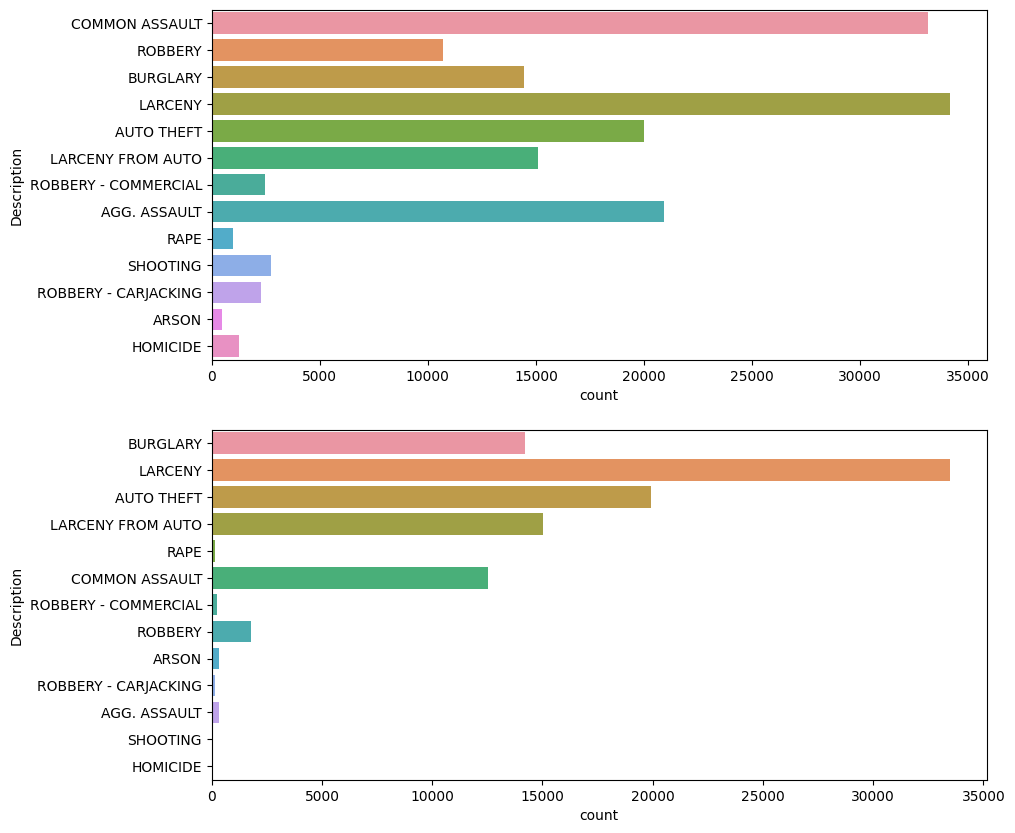

In [109]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
sns.countplot(y = df['Description'], ax = ax[0])
sns.countplot(y= df0['Description'], ax = ax[1])
fig.set_size_inches(10,10)
fig.show()

In [110]:
df['Weapon'].fillna('NO WEAPON', inplace = True)
df['Weapon'].isnull().sum()

0

In [111]:
display(df['Ethnicity'].value_counts().sum())
display(df['Ethnicity'].isnull().sum())

67353

91347

In [112]:
df['Ethnicity'].value_counts()

Ethnicity
NOT_HISPANIC_OR_LATINO    37834
UNKNOWN                   22239
HISPANIC_OR_LATINO         6312
MIDDLE_EASTERN              599
EAST_ASIAN                  233
SOUTH_ASIAN                 136
Name: count, dtype: int64

In [113]:
df_Ethnicity = pd.DataFrame({'ethn':df['Ethnicity'], 'race':df['Race']})

In [114]:
df_filtered = df_Ethnicity[df_Ethnicity['ethn'].isnull()]

In [115]:
df_filtered

ethn                       race
23      NaN                        NaN
30      NaN                      ASIAN
33      NaN  BLACK_OR_AFRICAN_AMERICAN
37      NaN  BLACK_OR_AFRICAN_AMERICAN
38      NaN  BLACK_OR_AFRICAN_AMERICAN
...     ...                        ...
158688  NaN                        NaN
158689  NaN  BLACK_OR_AFRICAN_AMERICAN
158695  NaN  BLACK_OR_AFRICAN_AMERICAN
158696  NaN  BLACK_OR_AFRICAN_AMERICAN
158697  NaN  BLACK_OR_AFRICAN_AMERICAN

[91347 rows x 2 columns]

In [116]:
df_filtered['race'].value_counts()

race
BLACK_OR_AFRICAN_AMERICAN                    45528
UNKNOWN                                      16564
WHITE                                        13770
ASIAN                                          404
AMERICAN_INDIAN_OR_ALASKA_NATIVE               125
NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER       71
Name: count, dtype: int64

In [117]:
df['Ethnicity'].value_counts()

Ethnicity
NOT_HISPANIC_OR_LATINO    37834
UNKNOWN                   22239
HISPANIC_OR_LATINO         6312
MIDDLE_EASTERN              599
EAST_ASIAN                  233
SOUTH_ASIAN                 136
Name: count, dtype: int64

In [118]:
df_Ethnicity['ethn'] = df_Ethnicity['race']

In [119]:
df_Ethnicity

ethn                       race
0       BLACK_OR_AFRICAN_AMERICAN  BLACK_OR_AFRICAN_AMERICAN
1       BLACK_OR_AFRICAN_AMERICAN  BLACK_OR_AFRICAN_AMERICAN
2       BLACK_OR_AFRICAN_AMERICAN  BLACK_OR_AFRICAN_AMERICAN
3       BLACK_OR_AFRICAN_AMERICAN  BLACK_OR_AFRICAN_AMERICAN
4       BLACK_OR_AFRICAN_AMERICAN  BLACK_OR_AFRICAN_AMERICAN
...                           ...                        ...
158695  BLACK_OR_AFRICAN_AMERICAN  BLACK_OR_AFRICAN_AMERICAN
158696  BLACK_OR_AFRICAN_AMERICAN  BLACK_OR_AFRICAN_AMERICAN
158697  BLACK_OR_AFRICAN_AMERICAN  BLACK_OR_AFRICAN_AMERICAN
158698                      WHITE                      WHITE
158699                      WHITE                      WHITE

[158700 rows x 2 columns]

In [120]:
df_Ethnicity['ethn'].replace({'BLACK_OR_AFRICAN_AMERICAN':'NOT_HISPANIC_OR_LATINO', 'WHITE' : 'NOT_HISPANIC_OR_LATINO', 'AMERICAN_INDIAN_OR_ALASKA_NATIVE': 'NOT_HISPANIC_OR_LATINO', 'NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER' : 'NOT_HISPANIC_OR_LATINO', 'ASIAN' : 'ASIAN'})

0         NOT_HISPANIC_OR_LATINO
1         NOT_HISPANIC_OR_LATINO
2         NOT_HISPANIC_OR_LATINO
3         NOT_HISPANIC_OR_LATINO
4         NOT_HISPANIC_OR_LATINO
                   ...          
158695    NOT_HISPANIC_OR_LATINO
158696    NOT_HISPANIC_OR_LATINO
158697    NOT_HISPANIC_OR_LATINO
158698    NOT_HISPANIC_OR_LATINO
158699    NOT_HISPANIC_OR_LATINO
Name: ethn, Length: 158700, dtype: object

In [121]:
df_Ethnicity

ethn                       race
0       BLACK_OR_AFRICAN_AMERICAN  BLACK_OR_AFRICAN_AMERICAN
1       BLACK_OR_AFRICAN_AMERICAN  BLACK_OR_AFRICAN_AMERICAN
2       BLACK_OR_AFRICAN_AMERICAN  BLACK_OR_AFRICAN_AMERICAN
3       BLACK_OR_AFRICAN_AMERICAN  BLACK_OR_AFRICAN_AMERICAN
4       BLACK_OR_AFRICAN_AMERICAN  BLACK_OR_AFRICAN_AMERICAN
...                           ...                        ...
158695  BLACK_OR_AFRICAN_AMERICAN  BLACK_OR_AFRICAN_AMERICAN
158696  BLACK_OR_AFRICAN_AMERICAN  BLACK_OR_AFRICAN_AMERICAN
158697  BLACK_OR_AFRICAN_AMERICAN  BLACK_OR_AFRICAN_AMERICAN
158698                      WHITE                      WHITE
158699                      WHITE                      WHITE

[158700 rows x 2 columns]

In [122]:
df.drop(columns=['Ethnicity'])
df['Ethnicity'] = df_Ethnicity['ethn']
df['Ethnicity'].isnull().sum()

20942

In [123]:
df['Gender'].value_counts()

Gender
F             68661
M             61283
Male           3205
U              1162
Female          480
B                13
N                 7
,                 6
FB                5
FW                2
W                 2
Transgende        2
D                 1
FU                1
FF                1
M\                1
T                 1
Name: count, dtype: int64

In [124]:
df['Gender'] = df['Gender'].replace({'Female':'F', 'FB':'F', 'FW':'F', 'W':'F', 'Transgende' : 'T', ',' : '', 'D' : '', 'FF':'F', 'FU':'F', 'Male': 'M', 'U': '', 'B':'','N':'','M\\':'M'})

In [125]:
df = df[df['Gender'].notnull()]

In [126]:
df['Gender'].value_counts()

Gender
F    69152
M    64489
      1189
T        3
Name: count, dtype: int64

In [127]:
df['Gender'].count()

134833

In [128]:
df.isnull().sum()

X                     125
Y                     125
RowID                   0
CCNumber                0
CrimeDateTime           0
CrimeCode               0
Description             0
Inside_Outside      11490
Weapon                  0
Post                  820
Gender                  0
Age                  4280
Race                 7527
Ethnicity            7527
Location             1758
Old_District        18995
New_District       116651
Neighborhood         1141
Latitude              125
Longitude             125
GeoLocation             0
PremiseType         11490
Total_Incidents         0
dtype: int64

In [129]:
df['New_District'].value_counts()

New_District
NORTHEAST    2439
CENTRAL      2430
SOUTHERN     2356
SOUTHEAST    2251
NORTHWEST    1883
SOUTHWEST    1791
WESTERN      1704
NORTHERN     1675
EASTERN      1651
ED              1
SW              1
Name: count, dtype: int64

In [130]:
df['Old_District'].value_counts()

Old_District
NORTHEAST    17338
SOUTHEAST    15554
SOUTHERN     13949
SOUTHWEST    13066
CENTRAL      12942
NORTHWEST    11776
NORTHERN     11375
EASTERN      10365
WESTERN       9462
SD               3
CD               2
SE               2
NWD              1
BAL              1
ND               1
WD               1
Name: count, dtype: int64

In [131]:
df_district = pd.DataFrame({'old': df['Old_District'], 'new':df['New_District']})

In [132]:
df_district

old        new
0             NaN  NORTHEAST
1             NaN  SOUTHWEST
2             NaN  NORTHEAST
3             NaN   SOUTHERN
4             NaN    CENTRAL
...           ...        ...
158695  NORTHWEST        NaN
158696   SOUTHERN        NaN
158697    WESTERN        NaN
158698  SOUTHEAST        NaN
158699  SOUTHWEST        NaN

[134833 rows x 2 columns]

In [133]:
df['District'] = df['Old_District'].fillna(df['New_District'])

In [134]:
df= df.drop(columns=['Old_District', 'New_District'])

In [135]:
df['District'].value_counts()

District
NORTHEAST    19777
SOUTHEAST    17805
SOUTHERN     16305
CENTRAL      15372
SOUTHWEST    14857
NORTHWEST    13659
NORTHERN     13050
EASTERN      12016
WESTERN      11166
SD               3
CD               2
SE               2
SW               1
NWD              1
BAL              1
ND               1
WD               1
ED               1
Name: count, dtype: int64

In [136]:
df.isnull().sum()/len(df)

X                  0.000927
Y                  0.000927
RowID              0.000000
CCNumber           0.000000
CrimeDateTime      0.000000
CrimeCode          0.000000
Description        0.000000
Inside_Outside     0.085217
Weapon             0.000000
Post               0.006082
Gender             0.000000
Age                0.031743
Race               0.055825
Ethnicity          0.055825
Location           0.013038
Neighborhood       0.008462
Latitude           0.000927
Longitude          0.000927
GeoLocation        0.000000
PremiseType        0.085217
Total_Incidents    0.000000
District           0.006030
dtype: float64

In [137]:
df['Age'].value_counts()

Age
 28.0     4234
 30.0     4228
 29.0     4170
 32.0     4116
 31.0     4051
          ... 
 635.0       1
 131.0       1
 103.0       1
 102.0       1
-21.0        1
Name: count, Length: 124, dtype: int64

In [138]:
df = df[(df['Age'].notnull()) & (10 < df['Age']) & (df['Age'] <= 76)]

In [139]:
df['date'] = pd.to_datetime(df['CrimeDateTime'], format='%Y/%m/%d %H:%M:%S%z')
df['Day'] = df['date'].dt.day
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year
df['Weekday'] = df['date'].dt.weekday + 1
df['Hour'] = df['date'].dt.hour

In [140]:
df.head(10)

X          Y  RowID  CCNumber           CrimeDateTime CrimeCode  \
0 -76.565233  39.329364      1  23H00334  2023/08/01 18:20:00+00        4E   
1 -76.676985  39.287522      2  23H00373  2023/08/01 21:26:00+00       3AF   
2 -76.560460  39.330913      3  23H00588  2023/08/01 18:30:00+00        5F   
3 -76.629319  39.248490      4  23K02505  2023/08/01 12:00:00+00        6F   
4 -76.621136  39.291551      5  23H00046  2023/08/01 01:16:00+00        6F   
5 -76.685439  39.279872      6  23H04775  2023/08/01 00:00:00+00        6F   
6 -76.587509  39.221677      7  23H00304  2023/08/01 00:00:00+00        7A   
7 -76.599266  39.323276      8  23H01339  2023/08/01 17:00:00+00        6F   
8 -76.578652  39.285064      9  23H00506  2023/08/01 17:00:00+00        6D   
9 -76.566037  39.350816     10  23H00505  2023/08/01 18:30:00+00        7A   

         Description Inside_Outside            Weapon   Post  ...  \
0     COMMON ASSAULT        Outside  PERSONAL_WEAPONS  421.0  ...   
1            ROBBERY         Inside           HANDGUN  821.0  ...   
2           BURGLARY        Outside         NO WEAPON  433.0  ...   
3            LARCENY            NaN         NO WEAPON  921.0  ...   
4            LARCENY         Inside         NO WEAPON  112.0  ...   
5            LARCENY        Outside         NO WEAPON  815.0  ...   
6         AUTO THEFT         Inside         NO WEAPON  913.0  ...   
7            LARCENY         Inside         NO WEAPON  315.0  ...   
8  LARCENY FROM AUTO         Inside         NO WEAPON  211.0  ...   
9         AUTO THEFT         Inside         NO WEAPON  421.0  ...   

                                GeoLocation        PremiseType  \
0  (39.329363999999998,-76.565233000000006)  OTHER/RESIDENTIAL   
1  (39.287522000000003,-76.676985000000002)             STREET   
2  (39.330913000000002,-76.560460000000006)  OTHER/RESIDENTIAL   
3  (39.248489999999997,-76.629318999999995)                NaN   
4  (39.291550999999998,-76.621136000000007)             STREET   
5  (39.279871999999997,-76.685439000000002)  OTHER/RESIDENTIAL   
6           (39.221677,-76.587508999999997)             STREET   
7                    (39.323276,-76.599266)             STREET   
8  (39.285063999999998,-76.578652000000005)             STREET   
9  (39.350816000000002,-76.566036999999994)             STREET   

  Total_Incidents   District                      date Day  Month  Year  \
0               1  NORTHEAST 2023-08-01 18:20:00+00:00   1      8  2023   
1               1  SOUTHWEST 2023-08-01 21:26:00+00:00   1      8  2023   
2               1  NORTHEAST 2023-08-01 18:30:00+00:00   1      8  2023   
3               1   SOUTHERN 2023-08-01 12:00:00+00:00   1      8  2023   
4               1    CENTRAL 2023-08-01 01:16:00+00:00   1      8  2023   
5               1  SOUTHWEST 2023-08-01 00:00:00+00:00   1      8  2023   
6               1   SOUTHERN 2023-08-01 00:00:00+00:00   1      8  2023   
7               1    EASTERN 2023-08-01 17:00:00+00:00   1      8  2023   
8               1  SOUTHEAST 2023-08-01 17:00:00+00:00   1      8  2023   
9               1  NORTHEAST 2023-08-01 18:30:00+00:00   1      8  2023   

  Weekday Hour  
0       2   18  
1       2   21  
2       2   18  
3       2   12  
4       2    1  
5       2    0  
6       2    0  
7       2   17  
8       2   17  
9       2   18  

[10 rows x 28 columns]

In [141]:
df['Inside_Outside'].value_counts()
df['Inside_Outside'] = df['Inside_Outside'].replace('I', 'Inside')
df['Inside_Outside'] = df['Inside_Outside'].replace('O', 'Outside')

In [142]:
df.describe()

X              Y          RowID           Post  \
count  127369.000000  127369.000000  127483.000000  126739.000000   
mean      -76.276935      39.131014  265272.122738     514.087179   
std         5.100805       2.616853   53161.590869     264.248976   
min       -76.711178       0.000000       1.000000      11.000000   
25%       -76.650163      39.287530  228297.500000     311.000000   
50%       -76.614261      39.302388  267539.000000     512.000000   
75%       -76.587141      39.325393  306552.500000     733.000000   
max         0.000000      39.372049  413729.000000     943.000000   

                 Age       Latitude      Longitude  Total_Incidents  \
count  127483.000000  127369.000000  127369.000000         127483.0   
mean       37.636822      39.131014     -76.276935              1.0   
std        14.395583       2.616853       5.100805              0.0   
min        11.000000       0.000000     -76.711178              1.0   
25%        27.000000      39.287530     -76.650163              1.0   
50%        35.000000      39.302388     -76.614261              1.0   
75%        47.000000      39.325393     -76.587141              1.0   
max        76.000000      39.372049       0.000000              1.0   

                 Day          Month           Year        Weekday  \
count  127483.000000  127483.000000  127483.000000  127483.000000   
mean       15.632445       6.619957    2021.652542       4.045488   
std         8.788340       3.254814       1.110232       2.014956   
min         1.000000       1.000000    2020.000000       1.000000   
25%         8.000000       4.000000    2021.000000       2.000000   
50%        16.000000       7.000000    2022.000000       4.000000   
75%        23.000000       9.000000    2023.000000       6.000000   
max        31.000000      12.000000    2023.000000       7.000000   

                Hour  
count  127483.000000  
mean       13.196897  
std         7.060135  
min         0.000000  
25%         8.000000  
50%        15.000000  
75%        19.000000  
max        23.000000

In [143]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, 
                        title="Pandas Profiling Report",
                        html={'style':{'full_width':True}},minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

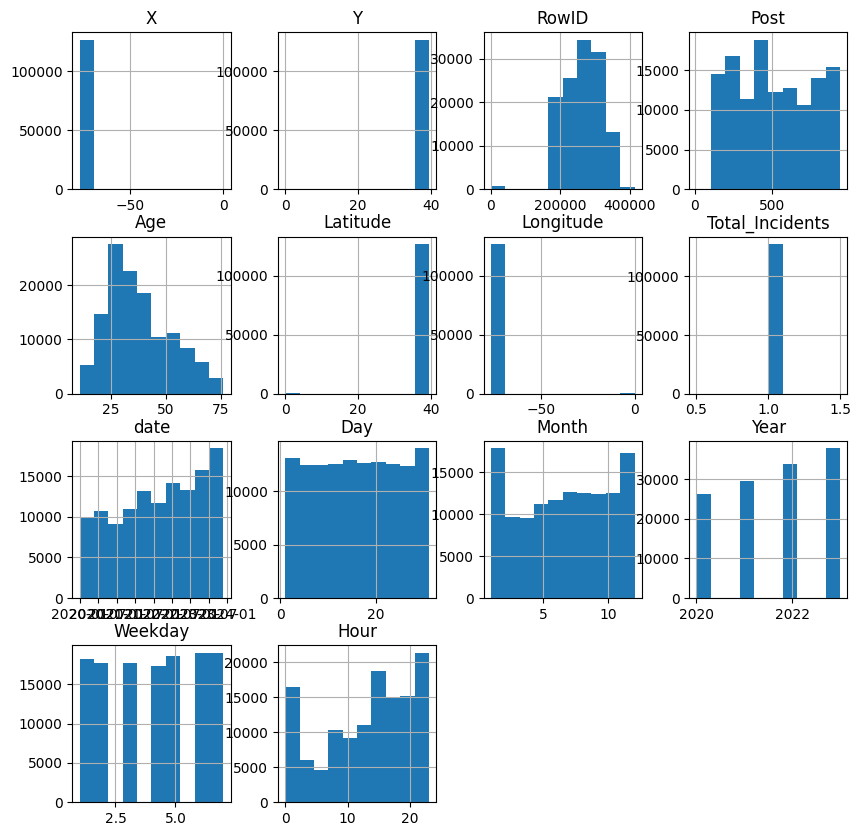

In [144]:
df.hist(figsize=(10, 10))
plt.show()

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127483 entries, 0 to 158699
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   X                127369 non-null  float64            
 1   Y                127369 non-null  float64            
 2   RowID            127483 non-null  int64              
 3   CCNumber         127483 non-null  object             
 4   CrimeDateTime    127483 non-null  object             
 5   CrimeCode        127483 non-null  object             
 6   Description      127483 non-null  object             
 7   Inside_Outside   117666 non-null  object             
 8   Weapon           127483 non-null  object             
 9   Post             126739 non-null  float64            
 10  Gender           127483 non-null  object             
 11  Age              127483 non-null  float64            
 12  Race             120480 non-null  object             
 13  Ethn

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[]

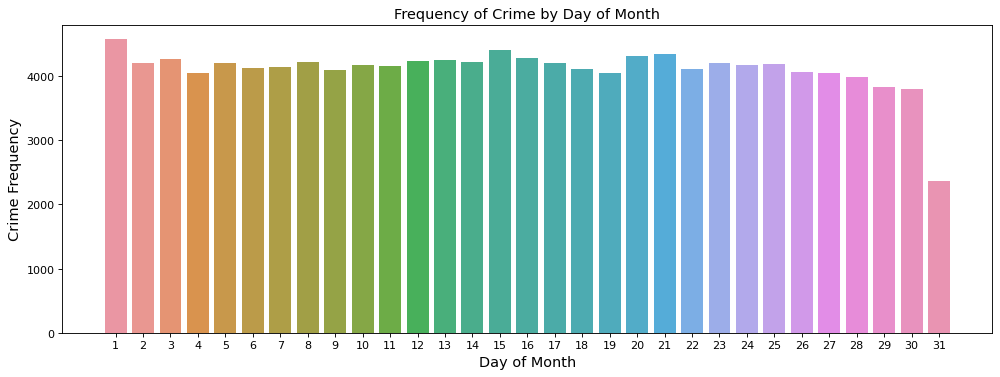

In [146]:
plt.figure(figsize=(15,5), dpi=80)

plt.title('Frequency of Crime by Day of Month', fontsize=13)
ax = sns.countplot(x = 'Day', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Day of Month', fontsize=13)
plt.plot()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[]

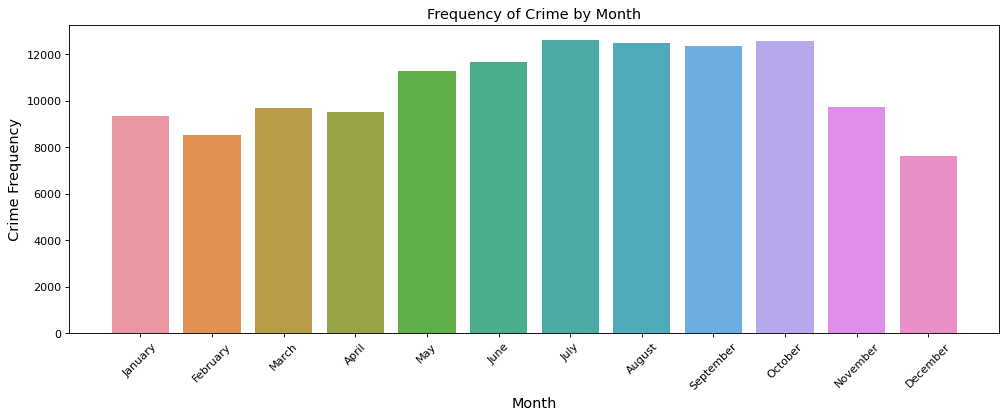

In [147]:
plt.figure(figsize=(15,5), dpi=80)

plt.title('Frequency of Crime by Month', fontsize=13)
ax = sns.countplot(x = 'Month', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Month', fontsize=13)
plt.xticks(rotation = 45)
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 
ax.set_xticklabels(labels)
plt.plot()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[]

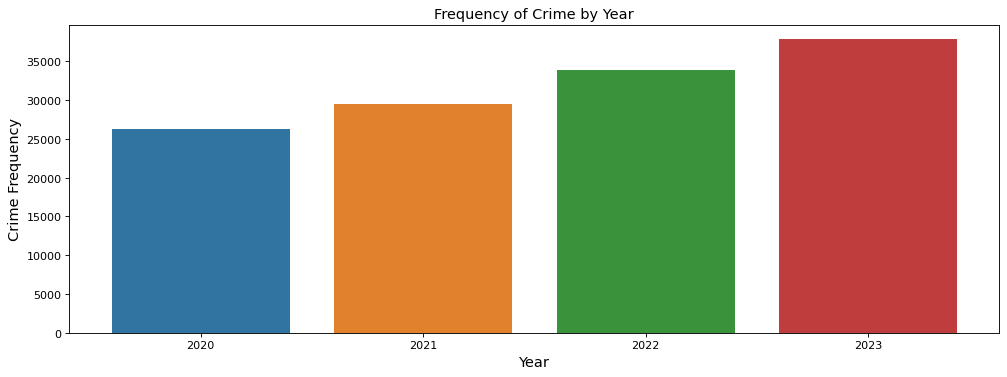

In [148]:
plt.figure(figsize=(15, 5), dpi=80)

plt.title('Frequency of Crime by Year', fontsize=13)
ax = sns.countplot(x = 'Year', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.plot()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[]

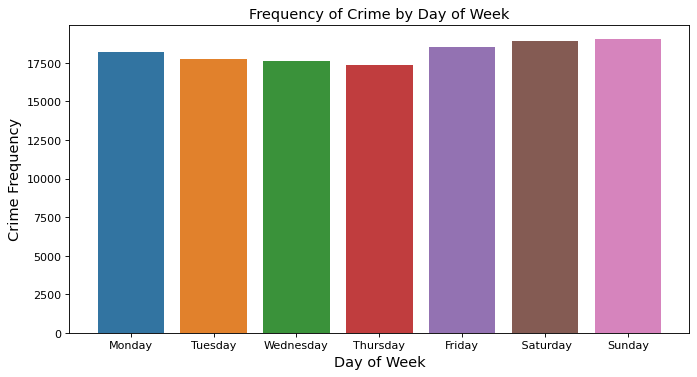

In [149]:
plt.figure(figsize=(10,5), dpi=80)

plt.title('Frequency of Crime by Day of Week', fontsize=13)
ax = sns.countplot(x = 'Weekday', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Day of Week', fontsize=13)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',' Saturday', 'Sunday']
ax.set_xticklabels(labels)
plt.plot()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

[]

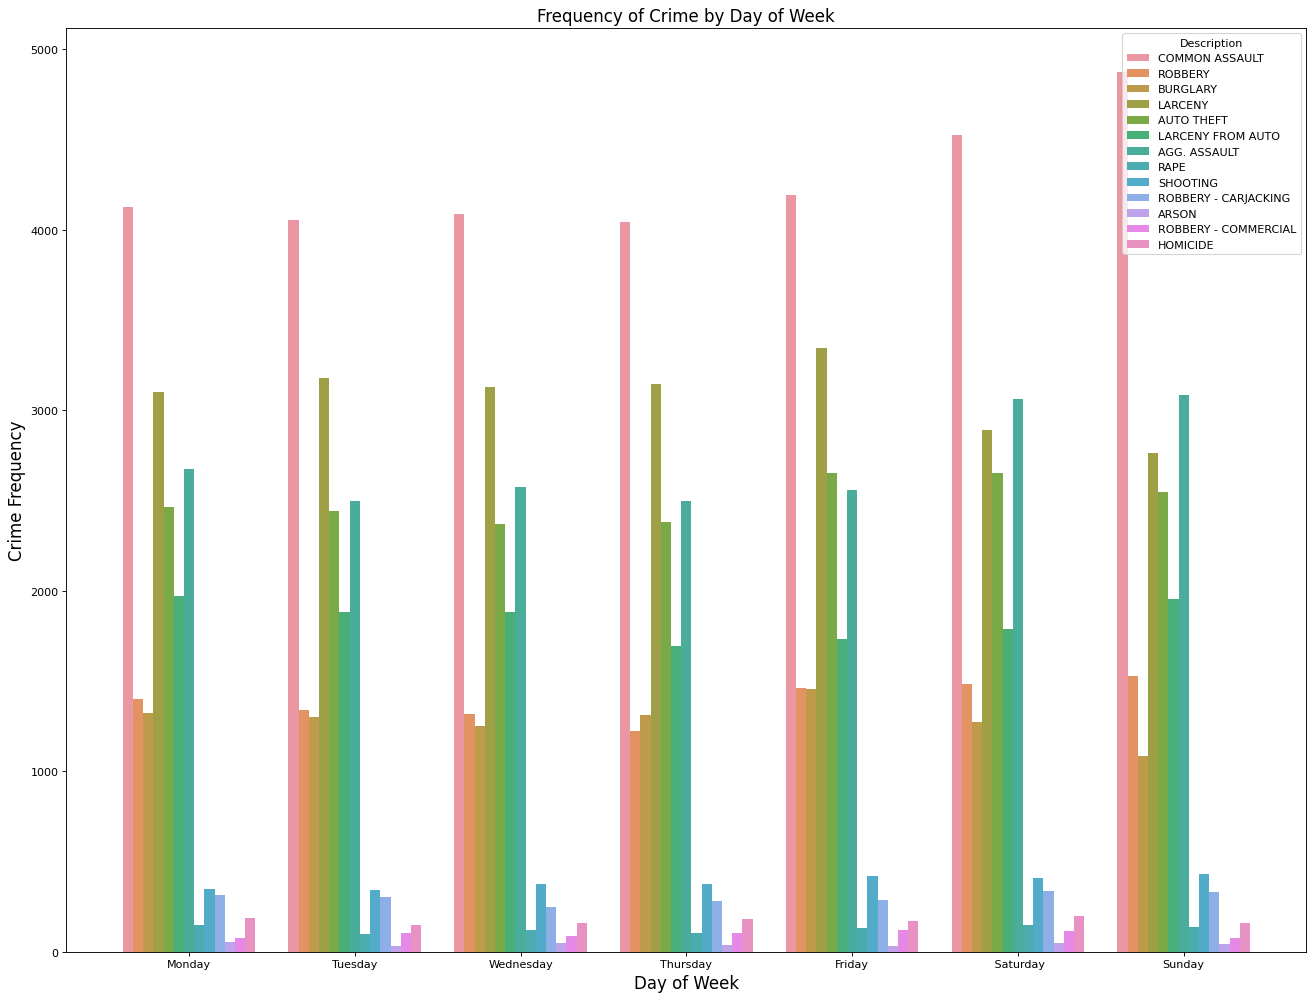

In [150]:
plt.figure(figsize=(20,15), dpi=80)

plt.title('Frequency of Crime by Day of Week', fontsize=15)
ax = sns.countplot(x = 'Weekday', hue = 'Description', data = df)
plt.ylabel("Crime Frequency", fontsize=15)
plt.xlabel('Day of Week', fontsize=15)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',' Saturday', 'Sunday']
ax.set_xticklabels(labels)
plt.plot()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[]

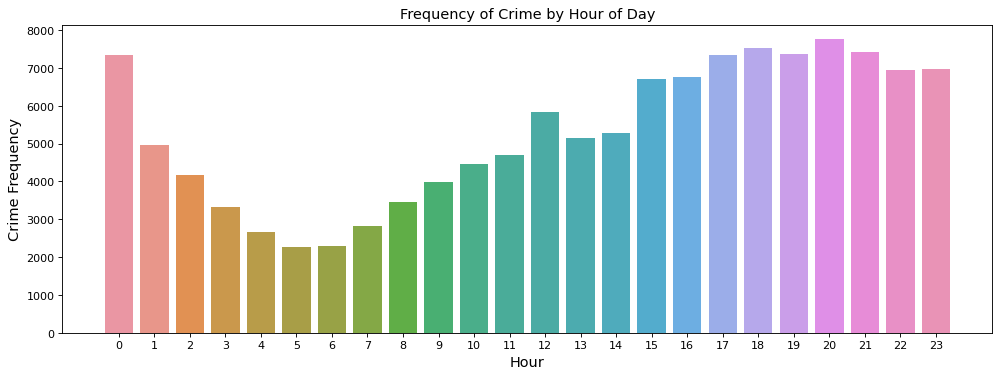

In [151]:
plt.figure(figsize=(15, 5), dpi=80)

plt.title('Frequency of Crime by Hour of Day', fontsize=13)
ax = sns.countplot(x = 'Hour', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Hour', fontsize=13)
plt.plot()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[]

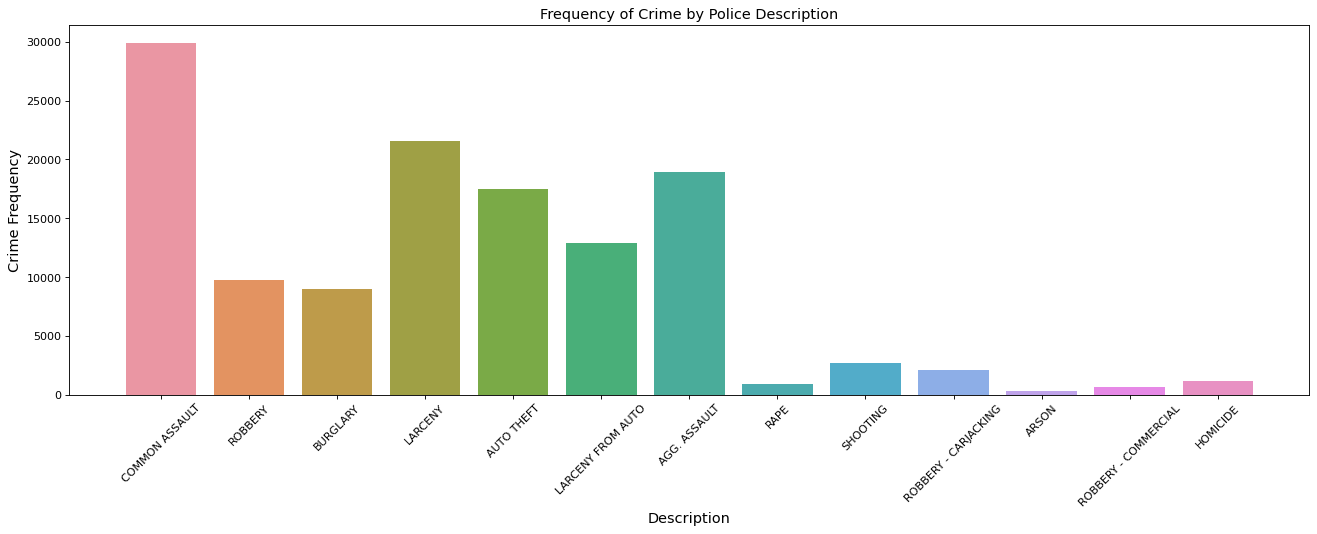

In [152]:
plt.figure(figsize=(20,6), dpi=80)

plt.title('Frequency of Crime by Police Description', fontsize=13)
ax = sns.countplot(x = 'Description', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Description', fontsize=13)
plt.xticks(rotation = 45)
plt.plot()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[]

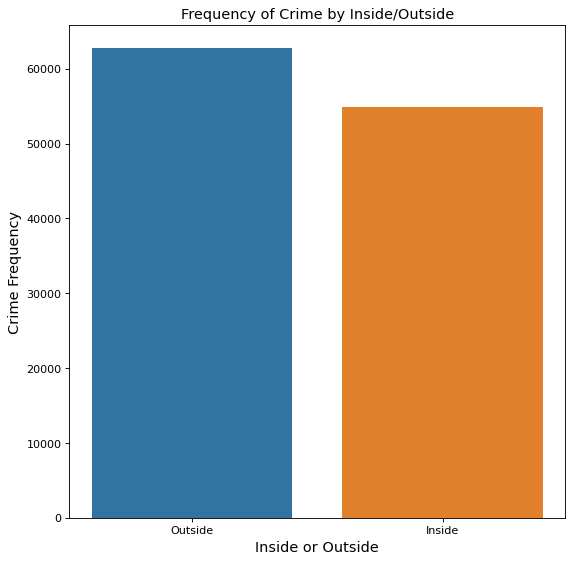

In [153]:
plt.figure(figsize=(8,8), dpi=80)

plt.title('Frequency of Crime by Inside/Outside', fontsize=13)
ax = sns.countplot(x = 'Inside_Outside', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Inside or Outside', fontsize=13)
plt.plot()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[]

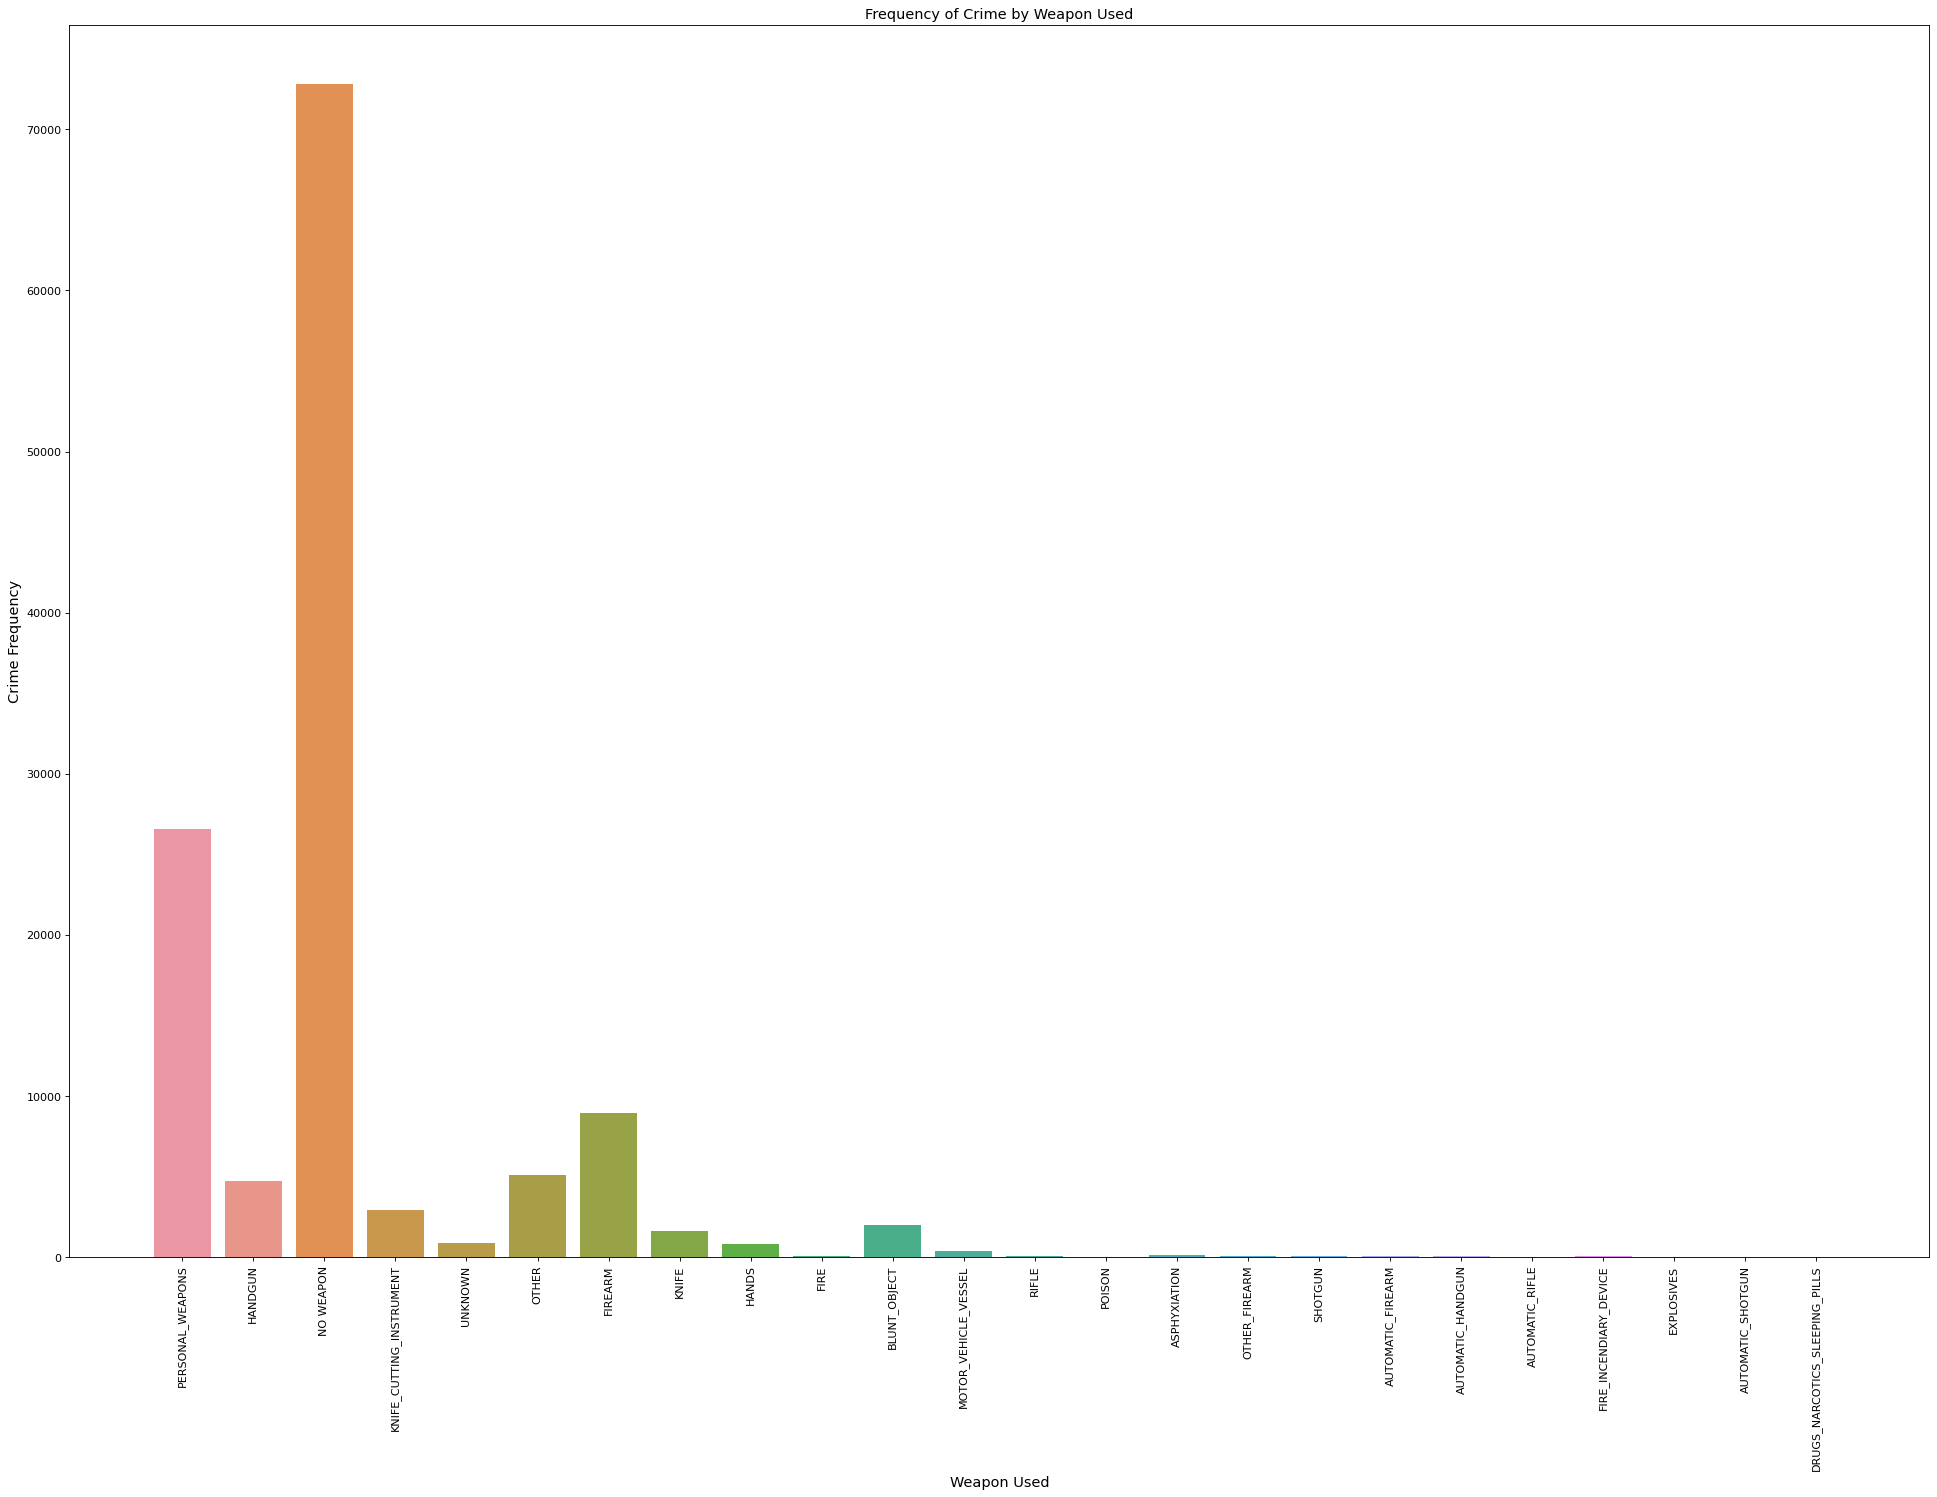

In [154]:
plt.figure(figsize=(30,20), dpi=80)

plt.title('Frequency of Crime by Weapon Used', fontsize=13)
ax = sns.countplot(x = 'Weapon', data = df )
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Weapon Used', fontsize=13)
plt.xticks(rotation = 90)
plt.plot()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

[]

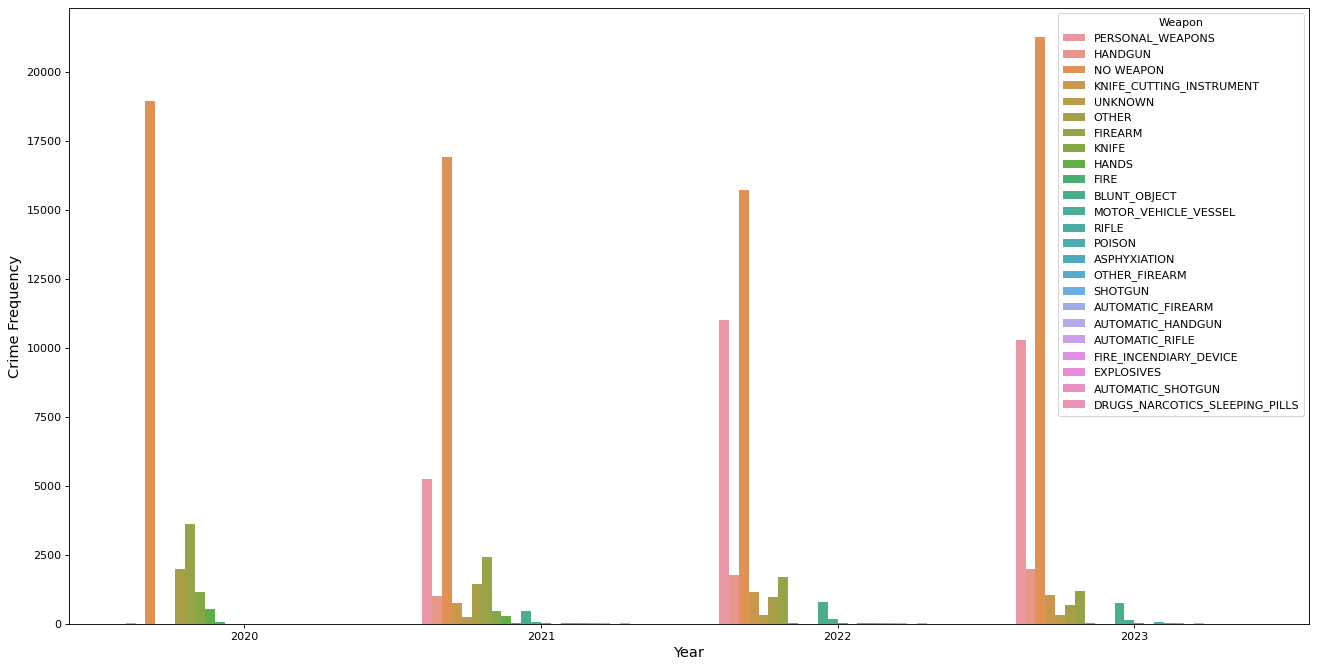

In [155]:
plt.figure(figsize = (20, 10), dpi = 80)

ax = sns.countplot(x = "Year", hue = "Weapon", data = df)
plt.ylabel("Frequency of Crime per Year Grouped by Weapon Used", fontsize = 13)
plt.ylabel("Crime Frequency", fontsize = 13)
plt.xlabel("Year", fontsize = 13)
plt.plot()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[]

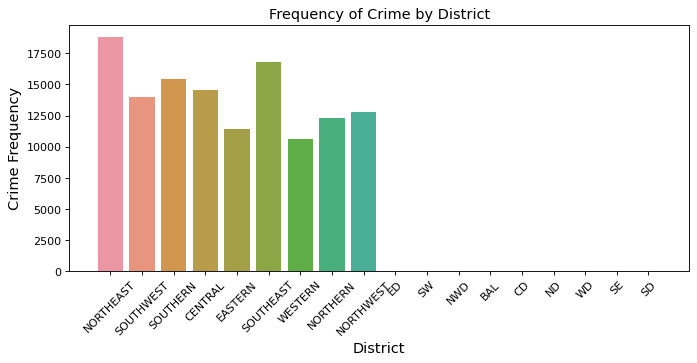

In [156]:
plt.figure(figsize=(10,4), dpi=80)

plt.title('Frequency of Crime by District', fontsize=13)
ax = sns.countplot(x = 'District', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('District', fontsize=13)
plt.xticks(rotation = 45)
plt.plot()


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

[]

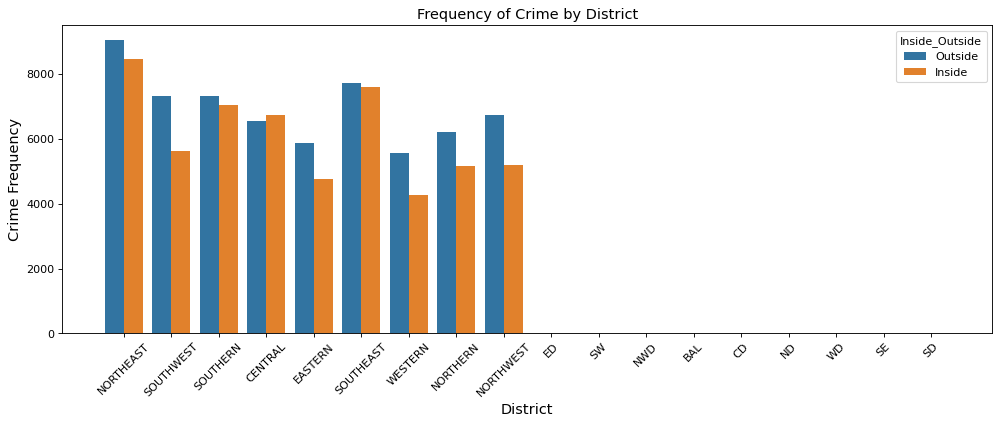

In [157]:
plt.figure(figsize=(15,5), dpi=80)

plt.title('Frequency of Crime by District', fontsize=13)
ax = sns.countplot(x = 'District', hue = 'Inside_Outside', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('District', fontsize=13)
plt.xticks(rotation = 45)
plt.plot()